In [ ]:
!pip install pandas_profiling
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.1 MB/s 


In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv")

In [ ]:
data1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
data1.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
#Data Structure 
type(data1)
data1.shape

(344, 7)

In [ ]:
#data types
data1.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data2=data1.iloc[:,1:]

In [ ]:
data2

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [ ]:
data1=data.fillna(0)

In [ ]:
data1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,0.0,0.0,0.0,0.0,0
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,0.0,0.0,0.0,0.0,0
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


# Duplicate

In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 6)

In [ ]:
data

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#Print the duplicated rows
data[data.duplicated()]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
data_cleaned1=data.drop_duplicates()

In [ ]:
data_cleaned1.shape

(344, 6)

# Drop Column

In [ ]:
data_cleaned2=data_cleaned1.drop('sex',axis=1)

In [ ]:
data_cleaned2

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0
341,Biscoe,50.4,15.7,222.0,5750.0
342,Biscoe,45.2,14.8,212.0,5200.0


# Rename the column

In [ ]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'bill_length_mm': 'bill_length'}, axis=1)

In [ ]:
data_cleaned3

,island,bill_length,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0
341,Biscoe,50.4,15.7,222.0,5750.0
342,Biscoe,45.2,14.8,212.0,5200.0


Outlier Detection

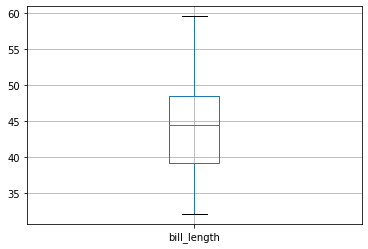

In [ ]:
#Box plot
data_cleaned3.boxplot(column=['bill_length'])

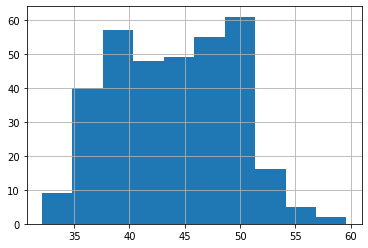

In [ ]:
# histogram of Ozone
data_cleaned3['bill_length'].hist()

In [ ]:
data_cleaned3

,island,bill_length,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0
341,Biscoe,50.4,15.7,222.0,5750.0
342,Biscoe,45.2,14.8,212.0,5200.0


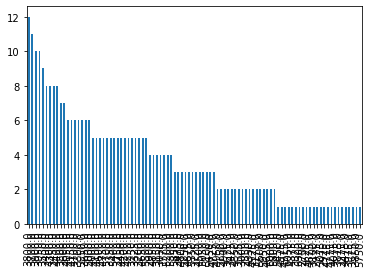

In [ ]:
#Bar plot
data['body_mass_g'].value_counts().plot.bar()

In [ ]:
#Descriptive stat
data_cleaned3['bill_depth_mm'].describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
# creating instance of one hot encoder
OHE = OneHotEncoder(handle_unknown='ignore')

In [ ]:
data[['island']]

,island
0,Torgersen
1,Torgersen
2,Torgersen
3,Torgersen
4,Torgersen
...,...
339,Biscoe
340,Biscoe
341,Biscoe
342,Biscoe


In [ ]:
island=OHE.fit_transform(data[['island']]).toarray()

In [ ]:
island

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
sex=OHE.fit_transform(data[['sex']]).toarray()

In [ ]:
sex

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
data.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
LE= LabelEncoder()
data['island']=LE.fit_transform(data['island'])

In [ ]:
data.island.value_counts()

0    168
1    124
2     52
Name: island, dtype: int64

In [ ]:
df=pd.get_dummies(data)
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,2,39.1,18.7,181.0,3750.0,0,1
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0
3,2,NaN,NaN,NaN,NaN,0,0
4,2,36.7,19.3,193.0,3450.0,1,0


# IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

In [ ]:
data_encoded=pd.get_dummies(data)

In [ ]:
data_encoded

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,2,39.1,18.7,181.0,3750.0,0,1
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0
3,2,NaN,NaN,NaN,NaN,0,0
4,2,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...,...
339,0,NaN,NaN,NaN,NaN,0,0
340,0,46.8,14.3,215.0,4850.0,1,0
341,0,50.4,15.7,222.0,5750.0,0,1
342,0,45.2,14.8,212.0,5200.0,1,0


In [ ]:
data_encoded1=data_encoded.fillna(0)

In [ ]:
data_encoded1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,2,39.1,18.7,181.0,3750.0,0,1
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0
3,2,0.0,0.0,0.0,0.0,0,0
4,2,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...,...
339,0,0.0,0.0,0.0,0.0,0,0
340,0,46.8,14.3,215.0,4850.0,1,0
341,0,50.4,15.7,222.0,5750.0,0,1
342,0,45.2,14.8,212.0,5200.0,1,0


In [ ]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, random_state=10)

In [ ]:
# predictions
y_pred_outliers = clf.predict(data_encoded1)

In [ ]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
data_encoded

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,2,39.1,18.7,181.0,3750.0,0,1
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0
3,2,NaN,NaN,NaN,NaN,0,0
4,2,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...,...
339,0,NaN,NaN,NaN,NaN,0,0
340,0,46.8,14.3,215.0,4850.0,1,0
341,0,50.4,15.7,222.0,5750.0,0,1
342,0,45.2,14.8,212.0,5200.0,1,0


In [ ]:
## Let us add a new data point which is outlier
data_encoded.loc[150]=[20,40,30,50,1,0,0]

In [ ]:
data_encoded

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,2,39.1,18.7,181.0,3750.0,0,1
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0
3,2,NaN,NaN,NaN,NaN,0,0
4,2,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...,...
339,0,NaN,NaN,NaN,NaN,0,0
340,0,46.8,14.3,215.0,4850.0,1,0
341,0,50.4,15.7,222.0,5750.0,0,1
342,0,45.2,14.8,212.0,5200.0,1,0


In [ ]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded1)
# predictions
y_pred_outliers = clf.predict(data_encoded1)
y_pred_outliers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([ 1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
data_encoded1['scores']=clf.decision_function(data_encoded1)

In [ ]:
data_encoded1['anomaly']=clf.predict(data_encoded1.iloc[:,0:7])

In [ ]:
data_encoded1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,scores,anomaly
0,2,39.1,18.7,181.0,3750.0,0,1,0.062491,1
1,2,39.5,17.4,186.0,3800.0,1,0,0.115138,1
2,2,40.3,18.0,195.0,3250.0,1,0,0.083226,1
3,2,0.0,0.0,0.0,0.0,0,0,-0.220445,-1
4,2,36.7,19.3,193.0,3450.0,1,0,0.074532,1
...,...,...,...,...,...,...,...,...,...
339,0,0.0,0.0,0.0,0.0,0,0,-0.222091,-1
340,0,46.8,14.3,215.0,4850.0,1,0,0.149413,1
341,0,50.4,15.7,222.0,5750.0,0,1,0.146730,1
342,0,45.2,14.8,212.0,5200.0,1,0,0.118993,1


In [ ]:
#Print the outlier data points
data_encoded[data_encoded1['anomaly']==-1]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
3,2,NaN,NaN,NaN,NaN,0,0
9,2,42.0,20.2,190.0,4250.0,0,0
47,1,37.5,18.9,179.0,2975.0,0,0
339,0,NaN,NaN,NaN,NaN,0,0


# pps score

In [ ]:
#install the package
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ppscore as pps
import pandas as pd

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv")

In [ ]:
d4

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#pps.score(df, "feature_column", "target_column")  syntax
pps.score(d4,'bill_length_mm','flipper_length_mm')

{'x': 'bill_length_mm',
 'y': 'flipper_length_mm',
 'ppscore': 0.15542348153719077,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 11.897660818713451,
 'model_score': 10.048484952120383,
 'model': DecisionTreeRegressor()}

In [ ]:
#calculate the whole PPS matrix
pps.matrix(d4)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,species,species,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,species,island,0.437243,classification,True,weighted F1,0.421512,0.674452,DecisionTreeClassifier()
2,species,bill_length_mm,0.491273,regression,True,mean absolute error,4.701462,2.391760,DecisionTreeRegressor()
3,species,bill_depth_mm,0.449200,regression,True,mean absolute error,1.657018,0.912686,DecisionTreeRegressor()
4,species,flipper_length_mm,0.558583,regression,True,mean absolute error,11.897661,5.251828,DecisionTreeRegressor()
5,species,body_mass_g,0.423315,regression,True,mean absolute error,666.374269,384.288310,DecisionTreeRegressor()
6,species,sex,0.000000,classification,True,weighted F1,0.537538,0.450057,DecisionTreeClassifier()
7,island,species,0.483122,classification,True,weighted F1,0.363372,0.670941,DecisionTreeClassifier()
8,island,island,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,island,bill_length_mm,0.116150,regression,True,mean absolute error,4.701462,4.155389,DecisionTreeRegressor()


# Decision Tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [ ]:
# import some data to play with
d5 =pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv")

In [ ]:
d5

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
d6=d5.fillna(0)

In [ ]:
d7=d6.drop(['island'],axis=1)

In [ ]:
d7

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,0.0,0.0,0.0,0.0,0
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Gentoo,0.0,0.0,0.0,0.0,0
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#Complete d5 dataset
label_encoder = preprocessing.LabelEncoder()
d7['species']= label_encoder.fit_transform(d7['species']) 

In [ ]:
x=d7.iloc[:,1:4]
y=d7['species']

In [ ]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
3,0.0,0.0,0.0
4,36.7,19.3,193.0
...,...,...,...
339,0.0,0.0,0.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [ ]:
d5.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
colnames = list(d5.columns)
colnames

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

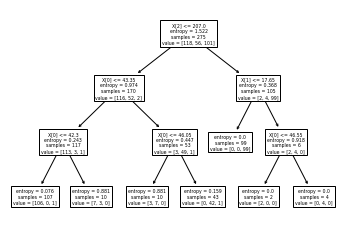

In [ ]:
tree.plot_tree(model);

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = d7.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

0.675743144232782